# Decision Trees Tutorial #
This notebook is based on the tutorial at: https://youtu.be/gdlwI9C-3Yo?si=RKYbFB89U1tmUke2  <br>
It teaches us about Decision Trees.  Decision trees are used for both regression and classification.  <br>
<br>
All state-of-the-art algorithms for tabular data use decision trees, so it is a very exciting subject to cover. We learn about the regression and classification tree, as well as more advanced topics such as bootstrap, boosting, and random forest. <br>
<br>
<br>
Github for the tutorial is: https://github.com/marcopeix/datasciencewithmarco <br>
<br>

## Theory ##

Decision trees work for gression and classification.  They divide the prediction space into a number of regions.  The set of splitting rules can be summarized as a tree.<br>
<br>
A single decision tree is not better than linear regression, logistic regression or LDA.  Bagging, random forests, and boosting dramatically improve performance.

#### Terminology ####
  - Trees are drawn upside down
  - The final regions are called **leaves**.  The point where a split occurs is called a **node**.  The segments that connect the nodes are **branches**

#### Regression Tree ####
  - Divide the predictor space into *J* distinct and non-overlapping regions.
  - For every observation that falls in a region, predict the mean of the response value in that region.
  - Each region is split to minimize the RSS (residual sum of squares)
  - It uses a top-down greedy approach called **recursive binary splitting**
  - Top-down means all observations are in a single region before the first split.
  - Greedy means that the best split occurs at a particular step to make the best prediction at that step, rather than looking forward and making splits that will give a better result in a future step.
  

#### Classification Tree ####
  - Predict the most commonly occuring class in a region.
  - RSS cannot be used; each split must minimize the **classification error rate**.
  - classification error rate is not sensitive enough, instead we use Gini index
  - Gini index is a good measure of node purity.  

#### Bagging ####
  - Bagging = Bootstrap Aggregation
  - Bootstrap can comput the standard deviation of any quantity.  For decision trees, variance tends to be high.
  - Bagging can reduce the variance and improve the performance of a decision tree.
  - Repeatedly draw samples from the dataset, generating B different bootstrap training sets.
  - Train on all bootstrapped training sets to get a prediction for each set and average the prediction. 
  - We can construct a high number of trees with high variance and low bias (overfit)
  - Then average the prediction to reduce the variance and improve performance.

#### Random Forests ####
  - Random forest improves upon bagging by making a small teak that decorrelates the trees.
  - Multiple decision trees are built.  At each split, only a random sample of *m* predictors is chosen from all *p* predictors.
  - The split is only allowed to use on of the *m* predictors
  - In bagging, if there is a strong predictor, it will likely be the top split and all trees will be similar.  Variance will not be reduced.
  - Random forest: only a subset of predictors is forced for each split.
  - if *m* = *p* then it is like bagging.

#### Boosting ####
  - Boosting works similar to bagging, but trees are grown sequentially.  Each tree uses information from the previously grown trees.
  - Learns more slowly, slow learning algorithms end up being better/less overfit.
  - Each tree fits the residuals instead of the target variable.  Each tree is small and will slowly improve the predictions.
  - 3 Tuning Parameters for Boosting:
    - Number of trees (**B**): boosting can overfit if B is too large.  Use cross-validation to limit overfitting.
    - Shrinkage parameter (**alpha**): a small positive number that controls the learning rate.  Typically 0.01 or 0.001.
    - Number of splits in each tree (**d**): controls the complexity of the boostsed ensemble.  A single split works well (d=1).  Also called interaction depth.

## Code ##

#### Dataset Description ####
`Age`: age of the patient (years)<br>
`BMI`: body mass index (kg/m2)<br>
`Glucose`: glucose concentration in blood (mg/dL)<br>
`Insulin`: insulin concentration in blood (microU/mL)<br>
`HOMA`: homeostatic model assessment of insulin resistance (glucose times insulin)<br>
`Leptin`: concentration of leptin - hormone of energy expenditure (ng/mL)<br>
`Adiponectin`: concentration of adiponectin - protein regulating glucose level (micro g/mL)<br>
`Resistin`: concentration of resistin - protein secreted by adipose tissue (ng/mL)<br>
`MCP.1`: concentration of MCP.1 - protein that recruits monocytes to the sites of inflammation due to tissue injure or inflammation (pg/dL)<br>
`Classification`: Healthy (1) or patient (2)"<br>

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [3]:
DATAPATH = "./data/breastCancer.csv"

data = pd.read_csv(DATAPATH)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


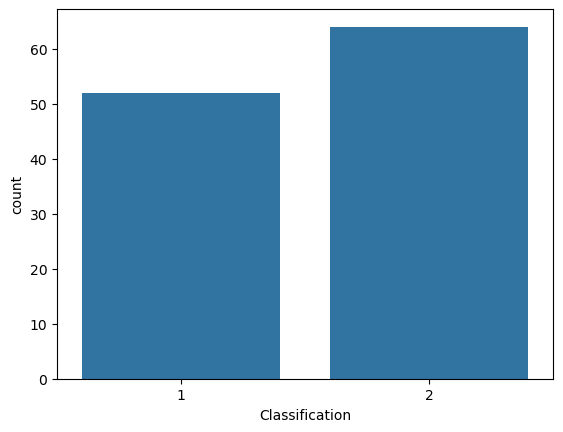

In [4]:
x = data['Classification']
ax = sns.countplot(x=x, data=data)

In [19]:
def violin_plots(x,y,data,hue):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7, 8.27)})
        ax = sns.violinplot(x=x, y=col, data=data, hue=hue, palette="dark:blue")

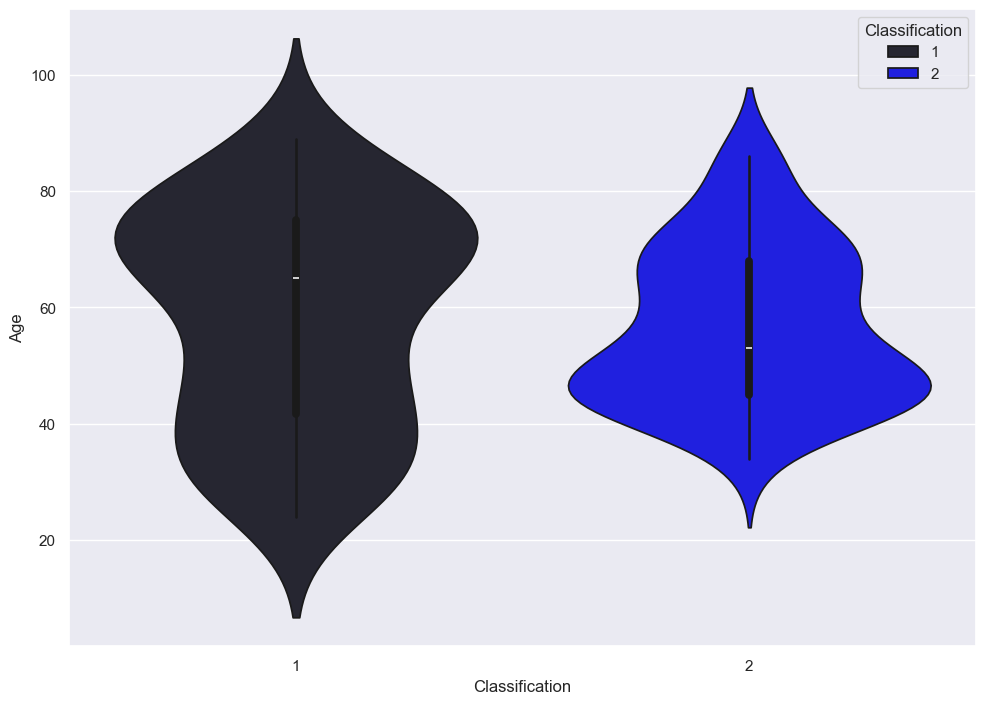

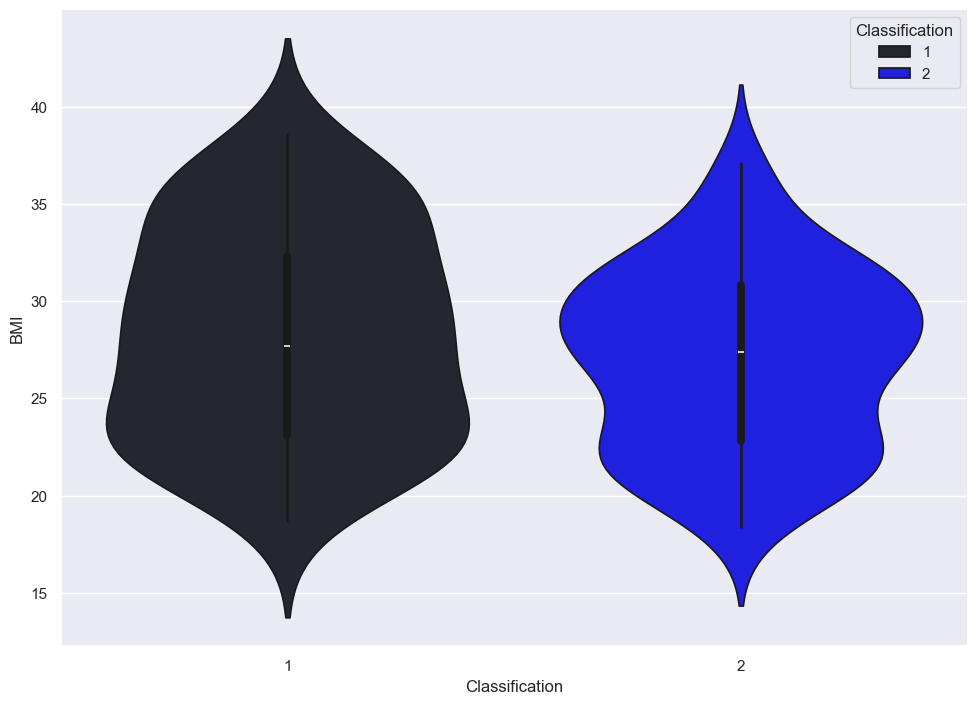

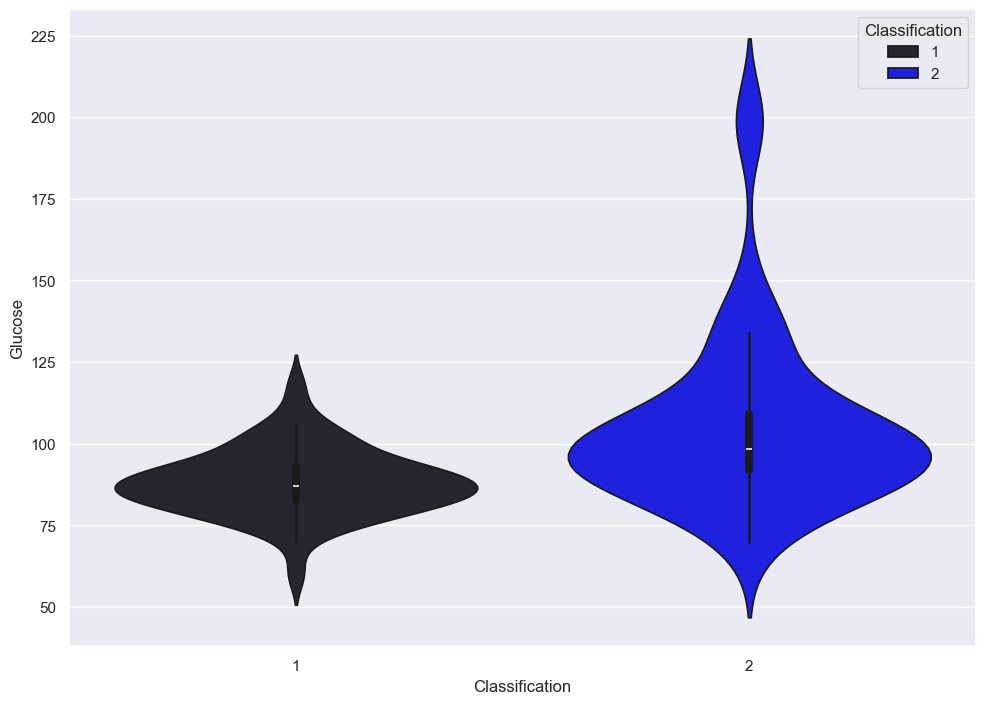

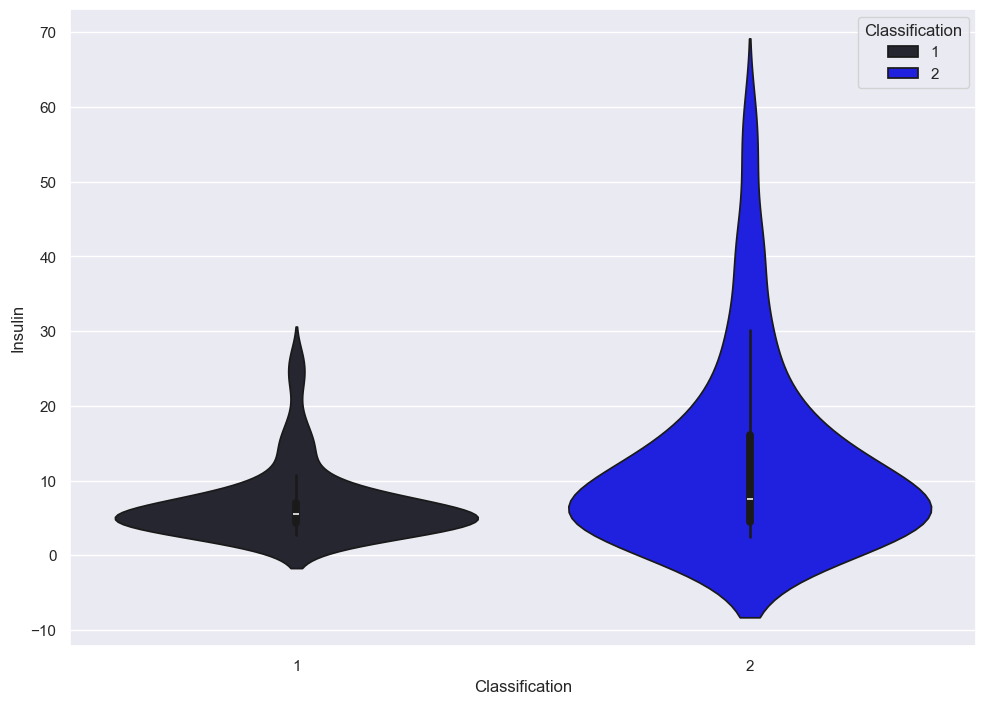

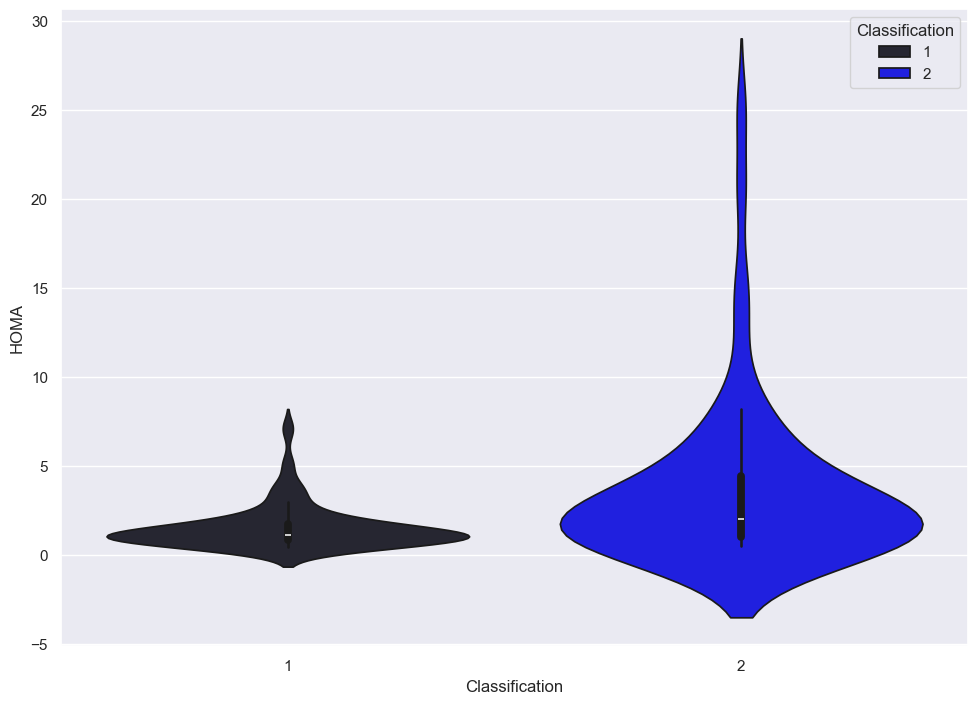

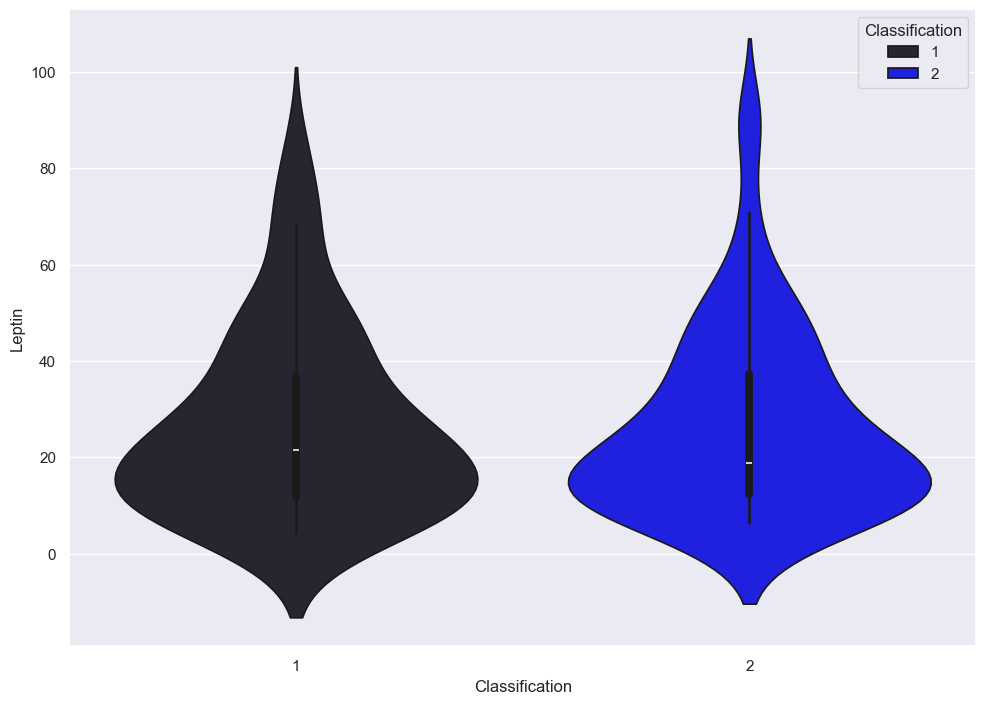

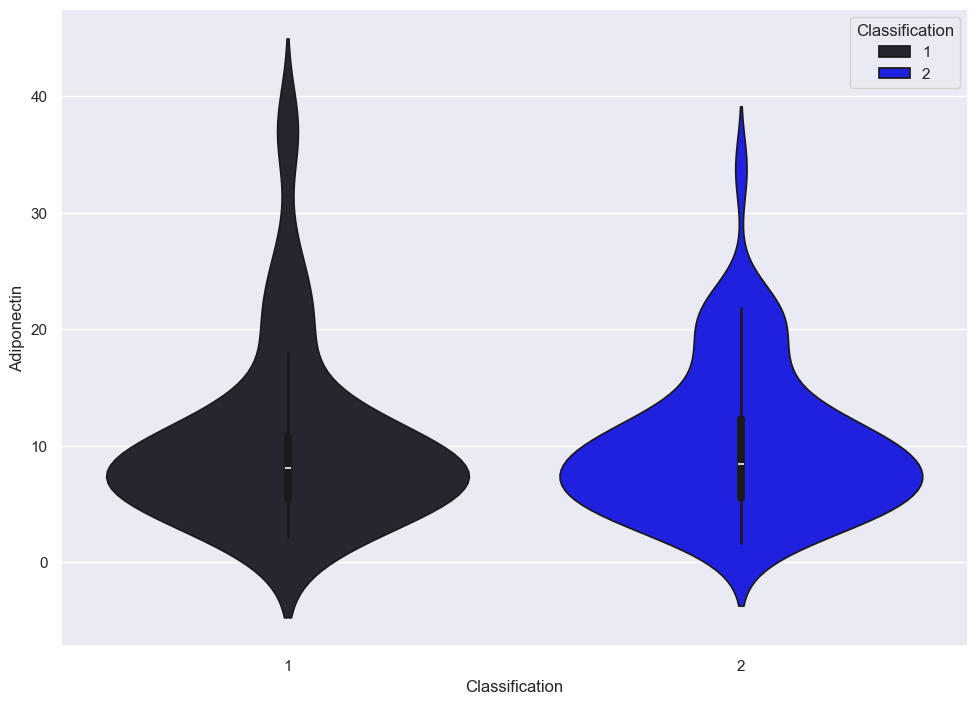

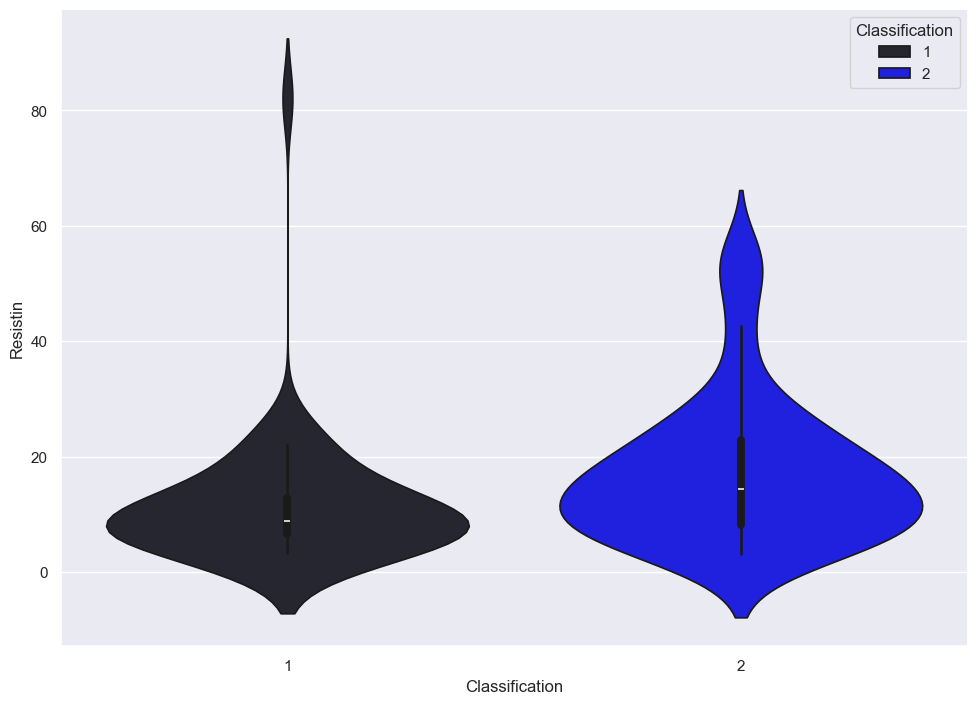

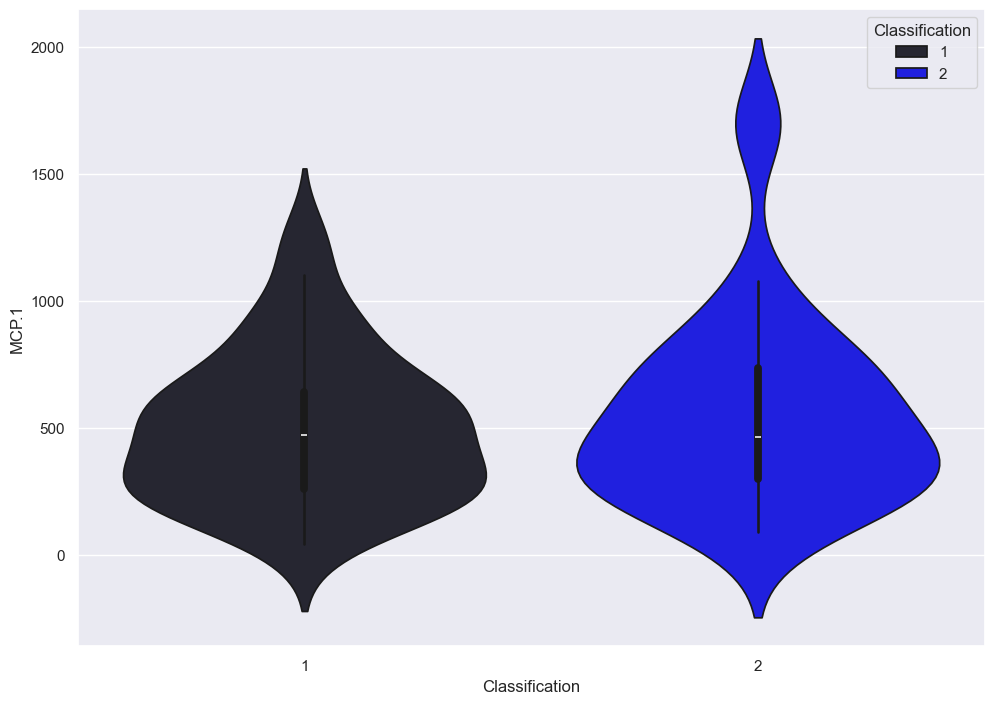

In [20]:
y = data.columns[:-1]
x = data.columns[-1]
violin_plots(x,y,data, data['Classification'])

In [21]:
for col in data.columns:
    print(f'{col}: {data[col].isnull().sum()}')

Age: 0
BMI: 0
Glucose: 0
Insulin: 0
HOMA: 0
Leptin: 0
Adiponectin: 0
Resistin: 0
MCP.1: 0
Classification: 0


### Preprocessing ###

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le. fit_transform(data['Classification'])
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [23]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1,1)
X = data.drop(['Classification'], axis = 1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

#### Baseline Model - Decision Tree Classifier ####

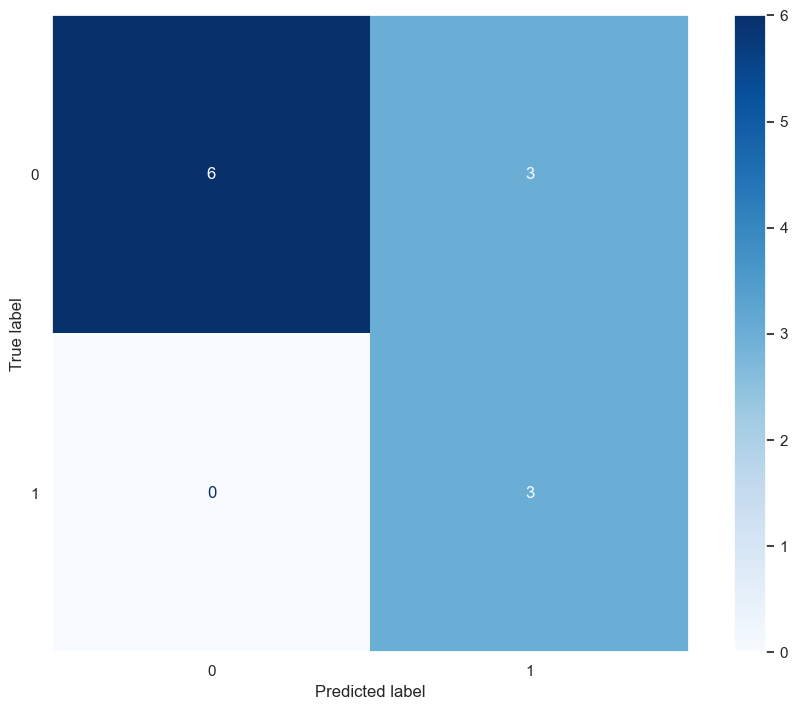

In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap = "Blues")
plt.grid(False)
plt.show()

[Text(0.4861111111111111, 0.9285714285714286, 'x[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28.0, 15.0]'),
 Text(0.39583333333333337, 0.8571428571428572, 'True  '),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.3611111111111111, 0.6428571428571429, 'x[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.1111111111111111, 0.35714285714285715, 'x[2] <= 84.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.2777777777777778, 0.21428571428

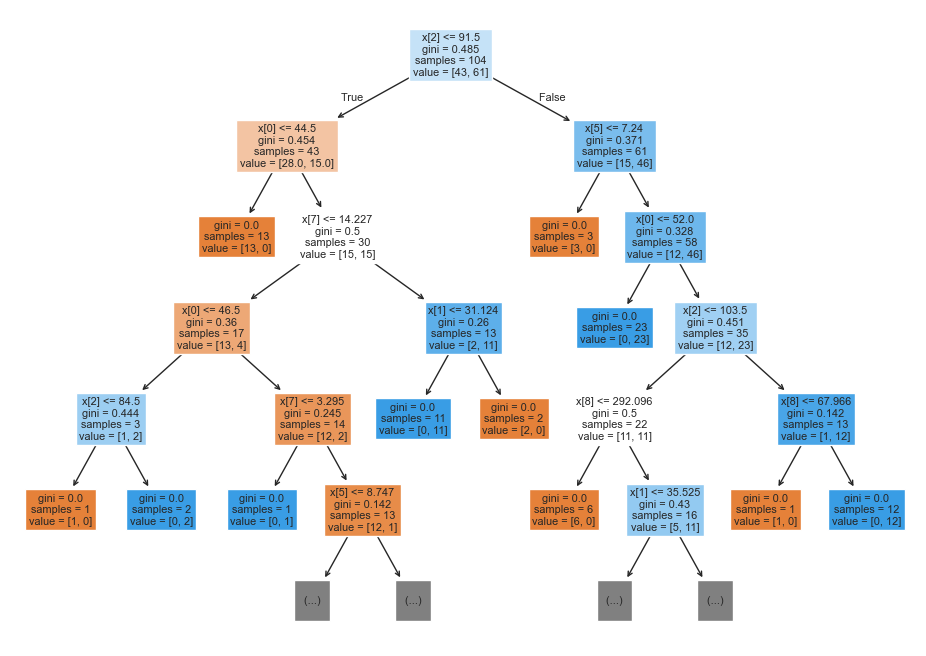

In [28]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=5, filled=True)

#### Bagging ####

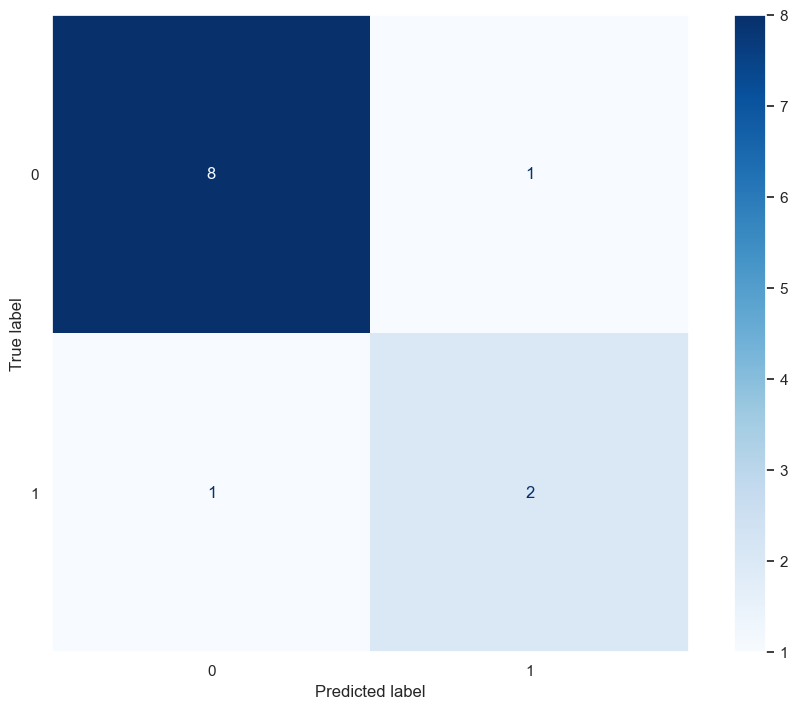

In [29]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(X_train, y_train.ravel())
y_pred = bagging_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = bagging_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_clf.classes_)
disp.plot(cmap = "Blues")
plt.grid(False)
plt.show()


#### Random Forest ####

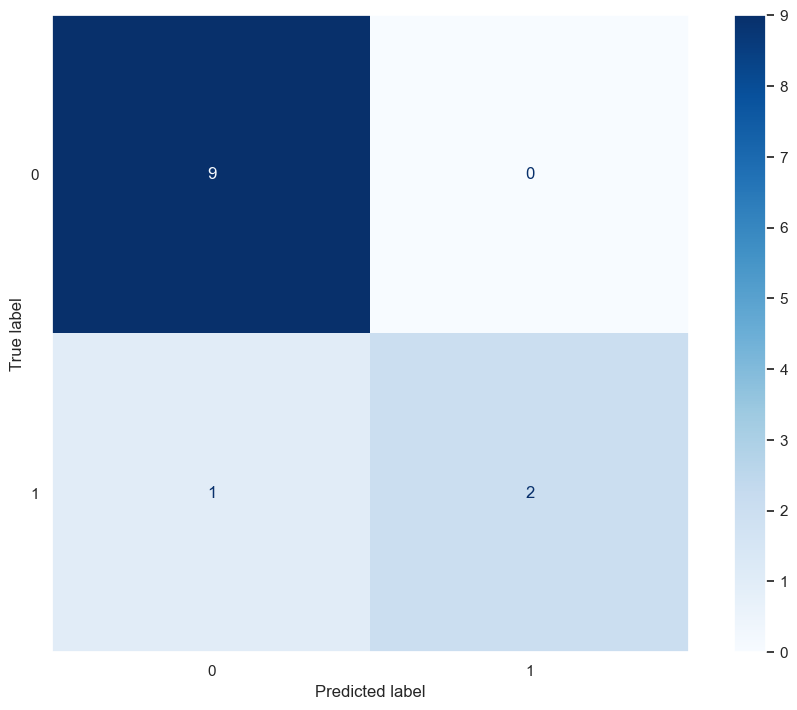

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(100)

rf_clf.fit(X_train, y_train.ravel())
y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap = "Blues")
plt.grid(False)
plt.show()

#### Boosting ####

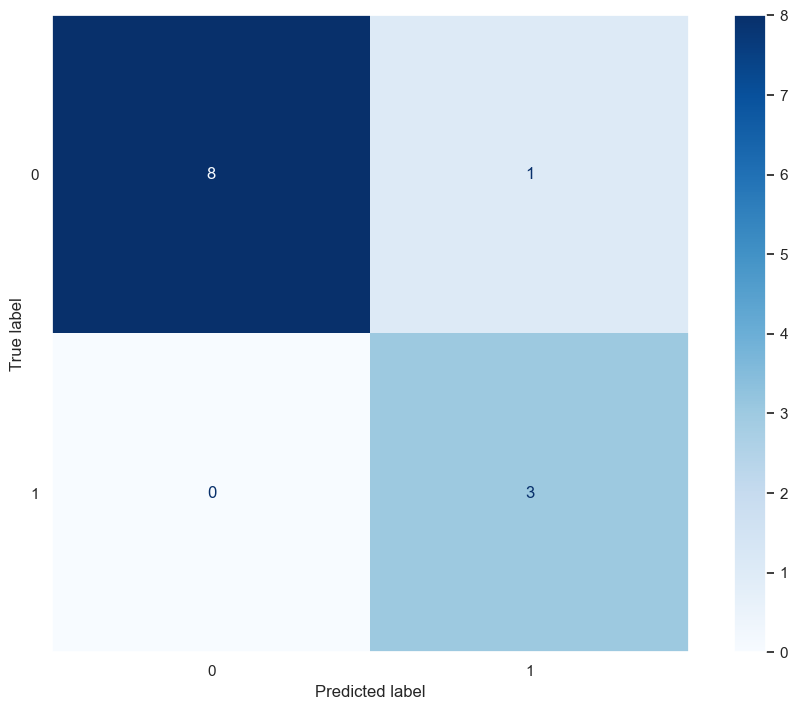

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(X_train, y_train.ravel())
y_pred = boost_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = boost_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=boost_clf.classes_)
disp.plot(cmap = "Blues")
plt.grid(False)
plt.show()